# Solutions to PS1

## Problem 1: Tensors and Automatic Differentiation

In [44]:
# Import Packages 
import torch

### 1a)

In [45]:
# Create the first tensor 
a = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])
print(a)

#Create the second tensor 
B = torch.ones(3,3)
print(B)

tensor([1., 2., 3., 4., 5.])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [46]:
# Reshape t1 
a_r = a.reshape(5,1)
print(a_r)

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])


In [47]:
# Square a 
a_sq = a **2 
print(a_sq)

tensor([ 1.,  4.,  9., 16., 25.])


In [48]:
# Matrix Product of B
B_B = B@B
print(B_B)

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])


### 1b)

In [49]:
# Computing the differential of f(x) analytically: 
# f'(x) = 2x+3
# f'(2) = 7

In [50]:
# Creating tensor and computing y 
x = torch.tensor([2.0], requires_grad=True)
y = x ** 2 + 3*x + 1

In [51]:
# Call y backwards and compute the gradient 
y.backward()

In [52]:
# Print the Computed Gradient
print(x.grad.item())

7.0


### 1c)

In [53]:
# Computing the partial differentials of g(x,y) analytically: 
# dg/dx = 2xy, at (1,2) is 4
# dy/dy = x**2 + 3y**2, at (1,2) is 13

In [54]:
# Compute both partial derivatives at (1,2)
x = torch.tensor([1.0], requires_grad=True)
y = torch.tensor([2.0], requires_grad=True)
g = x**2 * y +y ** 3
g.backward()

print(x.grad.item())
print(y.grad.item())

4.0
13.0


## Problem 2: Linear Regression in PyTorch

In [55]:
import torch 
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

### 2a)

In [56]:
# Generate synthetic data for linear regression
torch.manual_seed(0)
n_samples = 100
true_weight = 3.5
true_bias = 1.2
X = torch.randn(n_samples, 1)
y = true_weight * X + true_bias + 0.3 * torch.randn(n_samples, 1)

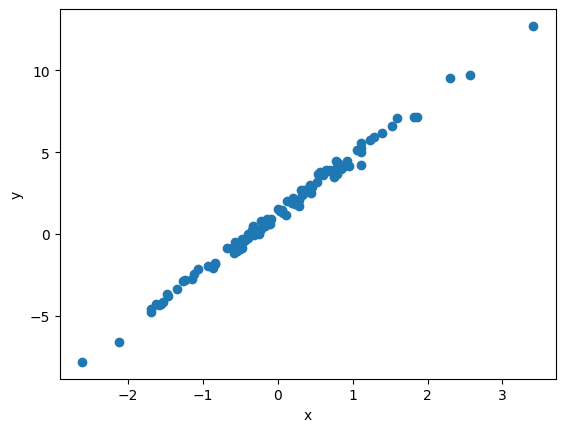

In [57]:
# Visualise the Data 
plt.scatter(X.numpy(), y.numpy())
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [58]:
# Create a linear regression model 
model = nn.Linear(in_features=1, out_features=1)
print(f"Initial random weight: {model.weight.data}")
print(f"Initial random bias: {model.bias.data}")

Initial random weight: tensor([[0.1248]])
Initial random bias: tensor([0.8957])


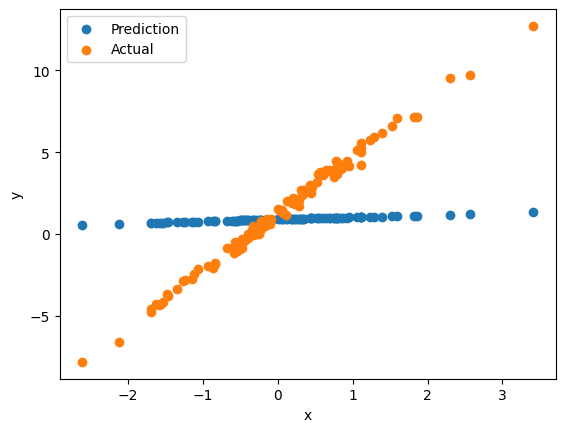

In [59]:
# Generate predicted X and plot 
y_hat = model(X)
plt.scatter(X.detach().numpy(), y_hat.detach().numpy(), label = "Prediction")
plt.scatter(X.numpy(), y.numpy(), label = "Actual")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### 2b)

Epoch: 0, Loss: 12.005885124206543
Epoch: 1, Loss: 7.4878716468811035
Epoch: 2, Loss: 4.681875705718994
Epoch: 3, Loss: 2.9387705326080322
Epoch: 4, Loss: 1.8556911945343018
Epoch: 5, Loss: 1.1825587749481201
Epoch: 6, Loss: 0.7641043663024902
Epoch: 7, Loss: 0.5039052367210388
Epoch: 8, Loss: 0.34206831455230713
Epoch: 9, Loss: 0.2413826584815979
Epoch: 10, Loss: 0.17872430384159088
Epoch: 11, Loss: 0.13971970975399017
Epoch: 12, Loss: 0.11543236672878265
Epoch: 13, Loss: 0.10030447691679001
Epoch: 14, Loss: 0.09087882936000824
Epoch: 15, Loss: 0.08500409126281738
Epoch: 16, Loss: 0.08134134113788605
Epoch: 17, Loss: 0.07905689626932144
Epoch: 18, Loss: 0.0776316374540329
Epoch: 19, Loss: 0.07674209773540497
Epoch: 20, Loss: 0.07618669420480728
Epoch: 21, Loss: 0.07583976536989212
Epoch: 22, Loss: 0.07562302052974701
Epoch: 23, Loss: 0.07548755407333374
Epoch: 24, Loss: 0.07540280371904373
Epoch: 25, Loss: 0.07534980028867722
Epoch: 26, Loss: 0.0753166452050209
Epoch: 27, Loss: 0.0752

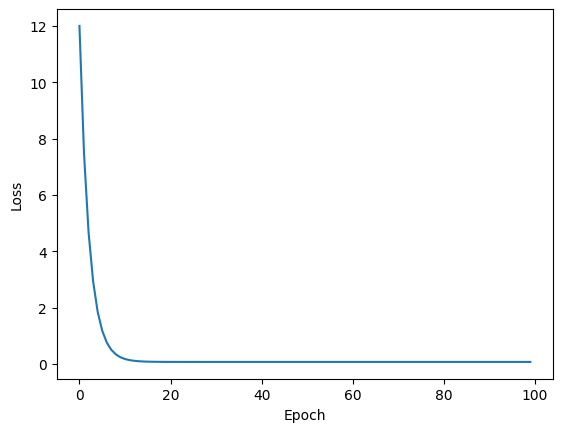

In [60]:
# Training Loop to fit the model 
criteria = nn.MSELoss() 
optimizer = optim.SGD(model.parameters(), lr=0.1)
n_epochs = 100 
loss_array = []

for epoch in range(n_epochs):
    # 1. Forward pass: compute predictions
    y_hat = model(X)
    # 2. Compute loss
    loss = criteria(y_hat,y)
    # 3. Zero gradients: optimizer.zero_grad()
    optimizer.zero_grad()
    # 4. Backward pass: loss.backward()
    loss.backward()
    # 5. Update parameters: optimizer.step()
    optimizer.step()

    #Store Loss History]
    loss_array.append(loss.item())
    print(f"Epoch: {epoch}, Loss: {loss}")

# Plot the Loss Curve 
plt.plot(loss_array)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### 2c)

In [61]:
print(f"Learned weight: {model.weight.item()}")
print(f"Learned bias: {model.bias.item()}")

Learned weight: 3.4643068313598633
Learned bias: 1.2479041814804077


In [62]:
# Calculate Analytical OLS Solution

# Create new X
ones  = torch.ones(X.shape[0],1)
X_new = torch.cat([X,ones], dim = 1)

# Calculate 
XTX = X_new.T @ X_new
XTy = X_new.T @ y
beta_hat = torch.linalg.solve(XTX, XTy)

w_ols = beta_hat[0].item()
b_ols = beta_hat[1].item()
print(f"Analytical weight: {w_ols}")
print(f"Analytical bias: {b_ols}")

print(f"Learned weight: {model.weight.item()}")
print(f"Learned bias: {model.bias.item()}")

print("Actual Weight: 3.5")
print("Actual Bias: 1.2")

Analytical weight: 3.4643070697784424
Analytical bias: 1.247903823852539
Learned weight: 3.4643068313598633
Learned bias: 1.2479041814804077
Actual Weight: 3.5
Actual Bias: 1.2


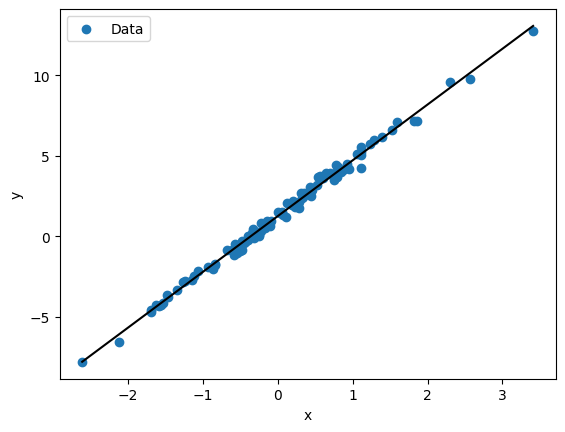

In [63]:
# Plot Learned Regression Line 
x_min = X.min().item()
x_max = X.max().item()
x_line = torch.tensor([[x_min],[x_max]])
y_line = model.weight.item() * x_line + model.bias.item()
plt.scatter(X.numpy(), y.numpy(), label = "Data")
plt.plot(x_line.numpy(), y_line.numpy(), color = "Black")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### 2d)

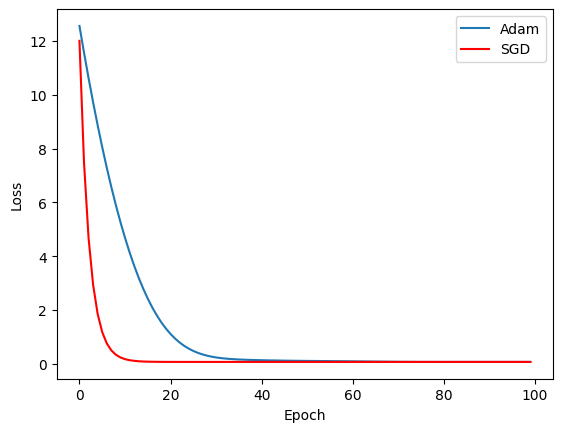

In [64]:
# Training Loop to fit the model with optim.Adam
model_adam = nn.Linear(in_features=1, out_features=1)
criteria = nn.MSELoss() 
optimizer = optim.Adam(model_adam.parameters(), lr=0.1)
n_epochs = 100 
loss_array_adam = []

for epoch in range(n_epochs):
    # 1. Forward pass: compute predictions
    y_hat = model_adam(X)
    # 2. Compute loss
    loss = criteria(y_hat,y)
    # 3. Zero gradients: optimizer.zero_grad()
    optimizer.zero_grad()
    # 4. Backward pass: loss.backward()
    loss.backward()
    # 5. Update parameters: optimizer.step()
    optimizer.step()
    #Store Loss History]
    loss_array_adam.append(loss.item())

# Plot the Loss Curve 
plt.plot(loss_array_adam, label = "Adam")
plt.plot(loss_array, label = "SGD", color = "Red")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# From the graph above, SGD converges faster 